In [2]:
import numpy as np
from scipy.sparse import csr_matrix
import paralleltomo as pt
from PIL import Image
import matplotlib.pyplot as plt
import math
import random
from scipy.ndimage import zoom

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


# Determine optimal parameters
From previous experiments, we assume a range for p of 175 to 250, at least 50 angles and a maximum resolution of N = 75.
The attenuation coefficients have previously been determined as shown below. The aim of this section is to visualise the change in condition number for changes in p and number of angles (len(theta)). Additionally, we want to showcase the accuracy of the recreated images using MSE evaluation.

In [2]:
# Mass attenuation coefficients fpo
mu_wood = 0.32190696
mu_steel = 7.938406
mu_lead = 30.32


In [3]:
# create image function 
def new_image(size,attenuation_wood=0.32190696,attenuation_steel=7.938406,attenuation_lead=30.32):
    image = np.zeros((size,size))
    resize = max(int(size/100),1)
    for i in range(0,size-resize, resize):
        for j in range(0, size-resize, resize):
            if random.random() < 0.00015:
                image[i:i+resize,j:j+resize] = attenuation_lead
            elif random.random() < 0.00015:
                image[i:i+resize,j:j+resize] = attenuation_steel
            else:
                image[i][j] = attenuation_wood
    return image

In [4]:
def calculatingB(A, resized_im):
    x = np.ravel(resized_im)
    b = np.matmul(A,x)
    return b

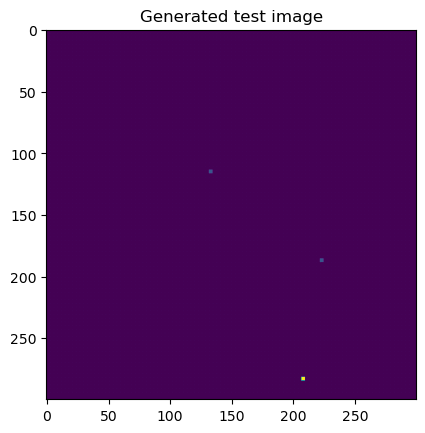

In [5]:
# create initial test image
size = 300
im = new_image(size)
plt.imshow(im)
plt.title("Generated test image")
plt.show()

We are assuming N = 75, since this has been the computational threshold.

We will first create an until now assumed optimal set up, then investigate threshold of under- and overdetermination.

In [7]:
N = 75
nr_angles = 50
theta = np.matrix(np.linspace(0,179,nr_angles))
p = 175

[A,theta,p,d] = pt.paralleltomo(N,theta,p)

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


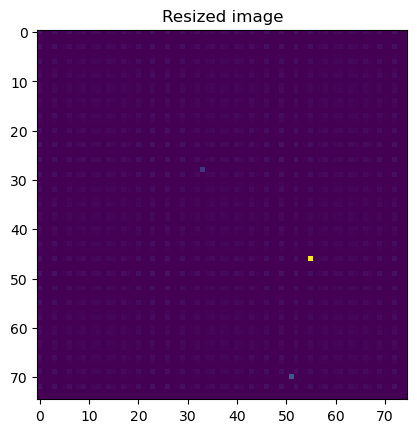

In [8]:
# resize image
resized_im = zoom(im, (N/size, N/size), order=1) # Using Bilinear Interpolation
plt.imshow(resized_im)  
plt.title("Resized image")
plt.show()

for now we add Gaussian noise

In [9]:
def addNoise(b):
    mean = np.mean(b)
    std = np.std(b)
    noise = np.random.normal(mean, std, b.shape)
    noisy_b = b + noise
    return noisy_b

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1594/428267165.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]


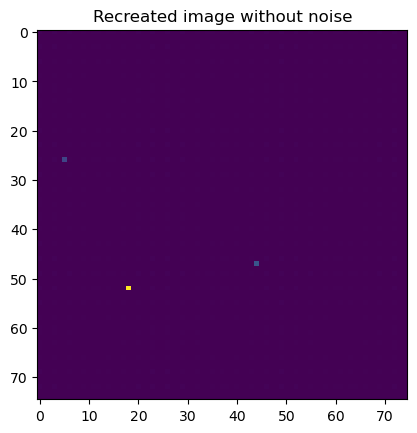

In [10]:
# create function to display original image next to recreated image

b = calculatingB(A, resized_im)
x_no_Noise = np.linalg.lstsq(A, b)[0]
resized_no_noise_im = np.resize(x_no_Noise, (N,N))
plt.imshow(resized_no_noise_im)
plt.title("Recreated image without noise")
plt.show()

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1594/1342439721.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


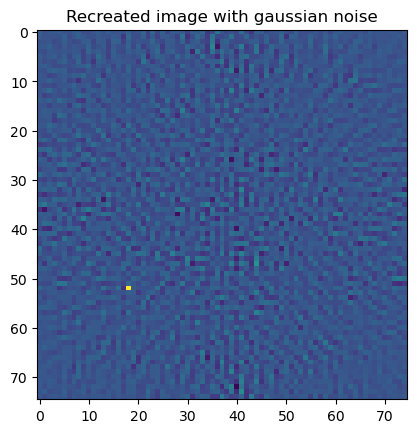

In [11]:
noisy_b = addNoise(b)
x_noisy = np.linalg.lstsq(A, noisy_b)[0]
resized_noise_im = np.resize(x_noisy, (N,N))
plt.imshow(resized_noise_im)
plt.title("Recreated image with gaussian noise")
plt.show()

# fig, axs = plt.subplots(1, 2, figsize=(17, 17))
# axs[0].imshow(resized_no_noise_im)
# axs[0].set_title("Recreated image without noise")
# axs[1].imshow(resized_noise_im)
# axs[1].set_title("Recreated image with gaussian noise")

# plt.show()

Side note: with these parameters, the image is not accurate enough

In [12]:
def recreateImage(A,resized_im):
    if(math.sqrt(A.shape[1]) != resized_im.shape[1]):
        return
    N = int(math.sqrt(A.shape[1]))
    b = calculatingB(A, resized_im)
    x_no_Noise = np.linalg.lstsq(A, b)[0]
    resized_no_noise_im = np.resize(x_no_Noise, (N,N))

    noisy_b = addNoise(b)
    x_noisy = np.linalg.lstsq(A, noisy_b)[0]
    resized_noise_im = np.resize(x_noisy, (N,N))

    fig, axs = plt.subplots(1, 2, figsize=(17, 17))
    axs[0].imshow(resized_no_noise_im)
    axs[0].set_title("Recreated image without noise")
    axs[1].imshow(resized_noise_im)
    axs[1].set_title("Recreated image with gaussian noise")

    plt.show()

    return x_no_Noise,x_noisy



We will increase the number of angles until an acceptable result is produced. Then, we will create A matrices for p values between 250 and the minimum requirement for that angle value.

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_79531/2370831630.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_79531/2370831630.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


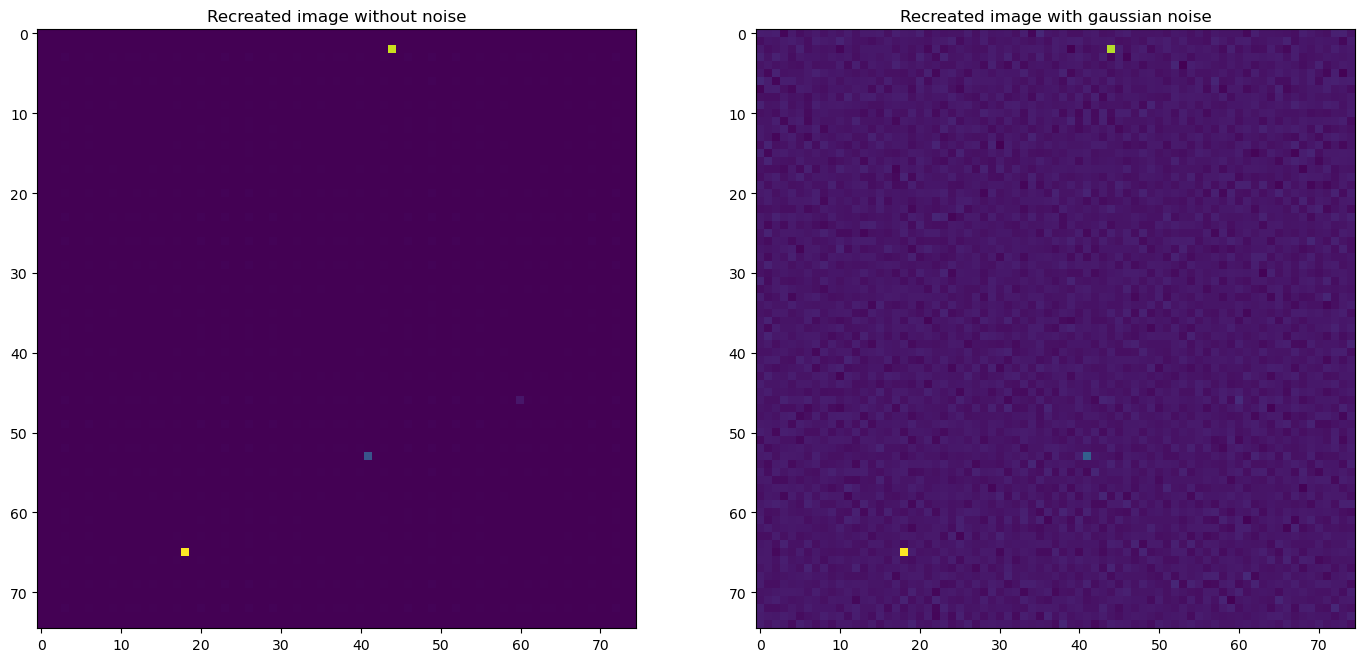

(array([-2.40218598e-14,  6.59472477e-14, -1.11022302e-14, ...,
         1.27816594e-15,  5.09314813e-15, -1.94982919e-15]),
 array([ 0.817261  ,  0.59588544,  0.87510764, ...,  0.13336665,
         0.22418201, -0.55438175]))

In [37]:
nr_angles = 90
theta = np.matrix(np.linspace(0,179,nr_angles))

[A,theta,p,d] = pt.paralleltomo(N,theta,p)
x_no_Noise,x_noisy = recreateImage(A,resized_im)

These images look appropriate, we will for now keep these parameters:
1) p = 175
2) nr_angles = 90
3) N = 75

In [13]:
np.linalg.cond(A)

581.7531752901073

In [14]:
(N**2)/nr_angles

112.5

We will investigate values of p between 113 and 250. For that we will keep the number of angles constant and compute both condition number and MSE using Gaussian noise.

In [15]:
ps = []
for t in range(math.ceil((N**2)/nr_angles),270,20):
    ps.append(t)

A_change_p = []
for pts in ps:
    [A,theta,p,d] = pt.paralleltomo(N,theta,pts)
    A_change_p.append(A)



/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [16]:
cAp = []
for a in A_change_p:
    cAp.append(np.linalg.cond(a))
cAp

[5.339318723098781e+47,
 7367787427727041.0,
 2496.179295809592,
 582.916135316276,
 643.8386693882771,
 576.7249094637435,
 625.1447436202902,
 354.7507845381951]

In [17]:
log10_A = []
for a in cAp:
    log10_A.append(np.log10(a))
log10_A

[47.72748584622813,
 15.867337087289647,
 3.39727577667711,
 2.7656060769043425,
 2.8087770571548303,
 2.760968709533015,
 2.7959805838683667,
 2.549923364581188]

In [18]:
ps

[113, 133, 153, 173, 193, 213, 233, 253]

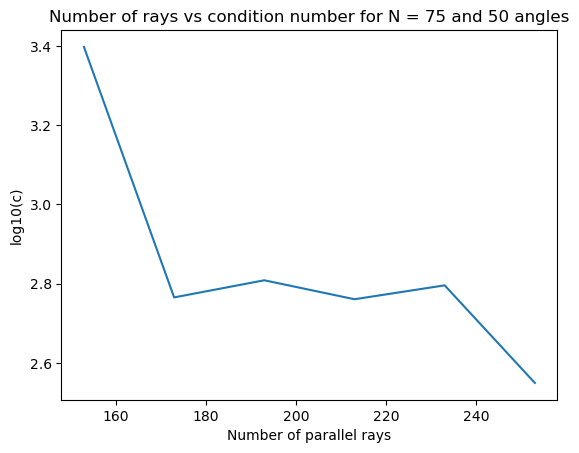

In [19]:
plt.plot(ps[2:],log10_A[2:])
plt.xlabel("Number of parallel rays")
plt.ylabel("log10(c)")
plt.title(f"Number of rays vs condition number for N = {N} and {nr_angles} angles")
plt.show()

We observe a local minimum around 175, which we will pick as the optimal p value.

We now investigate the change in condition number for a change in number of angles, ranging from a maximum of 180 to the minimum tolerated by the optimal value of p = 175.

In [11]:
p_opt = 175
math.ceil((N**2)/p_opt)

33

In [21]:
nr_angles_var = np.arange(math.ceil((N**2)/p_opt),180,30).tolist()
nr_angles_var

[33, 63, 93, 123, 153]

In [22]:
A_change_angles = []
for angle in nr_angles_var:
    theta = np.matrix(np.linspace(0,179,angle))
    [A,theta,p,d] = pt.paralleltomo(N,theta,p_opt)
    A_change_angles.append(A)

cAa = []
for a in A_change_angles:
    cAa.append(np.linalg.cond(a))
cAa

[1.965053403731296e+31,
 87.6823945960683,
 35.1920075574492,
 23.738850527833424,
 20.746658962036513]

In [23]:
log10_A_ang = []
for a in cAa:
    log10_A_ang.append(np.log10(a))
log10_A_ang

[31.29337435757692,
 1.9429124018343875,
 1.5464440422331318,
 1.3754596859115338,
 1.3169481679792427]

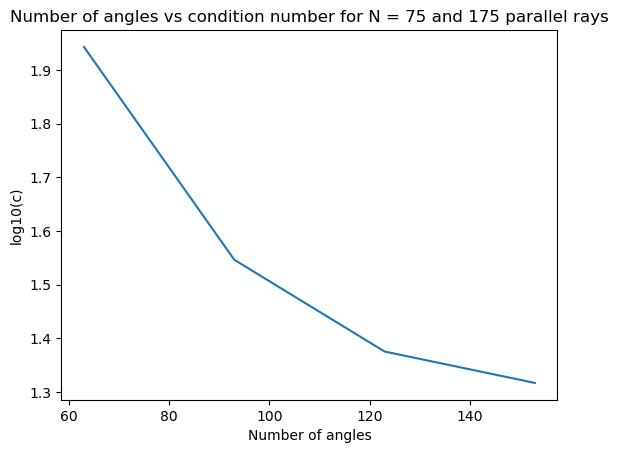

In [25]:
plt.plot(nr_angles_var[1:],log10_A_ang[1:])
plt.xlabel("Number of angles")
plt.ylabel("log10(c)")
plt.title(f"Number of angles vs condition number for N = {N} and {p_opt} parallel rays")
plt.show()

The slope first changes at around 90 angles, which is the value our previous experiments indicated to be an acceptable threshold value of len(theta). We accept this as our ideal value of p.

However, to further this investigation we will now recreate the test images from the generated system matrices and compare their mean squared errors.

In [27]:

np.mean(np.square(x_no_Noise-x_noisy))
# x_no_Noise,x_noisy

6.214941190894287

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1594/2370831630.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1594/2370831630.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


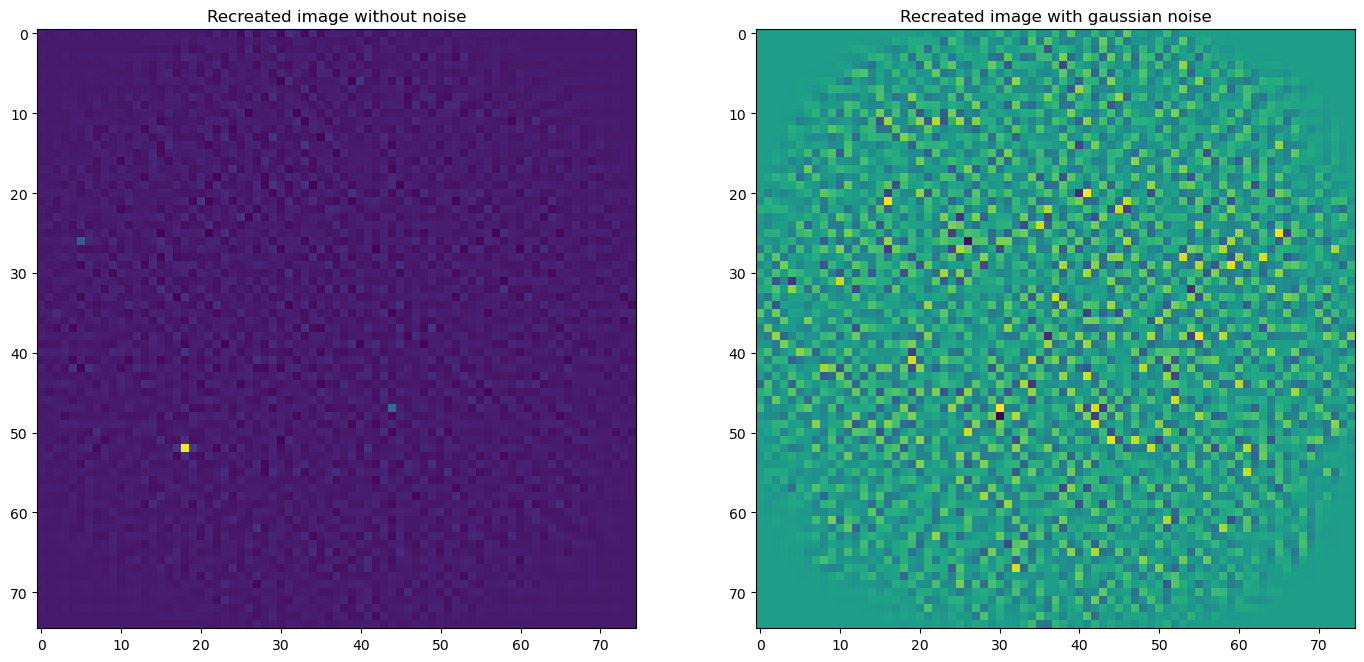

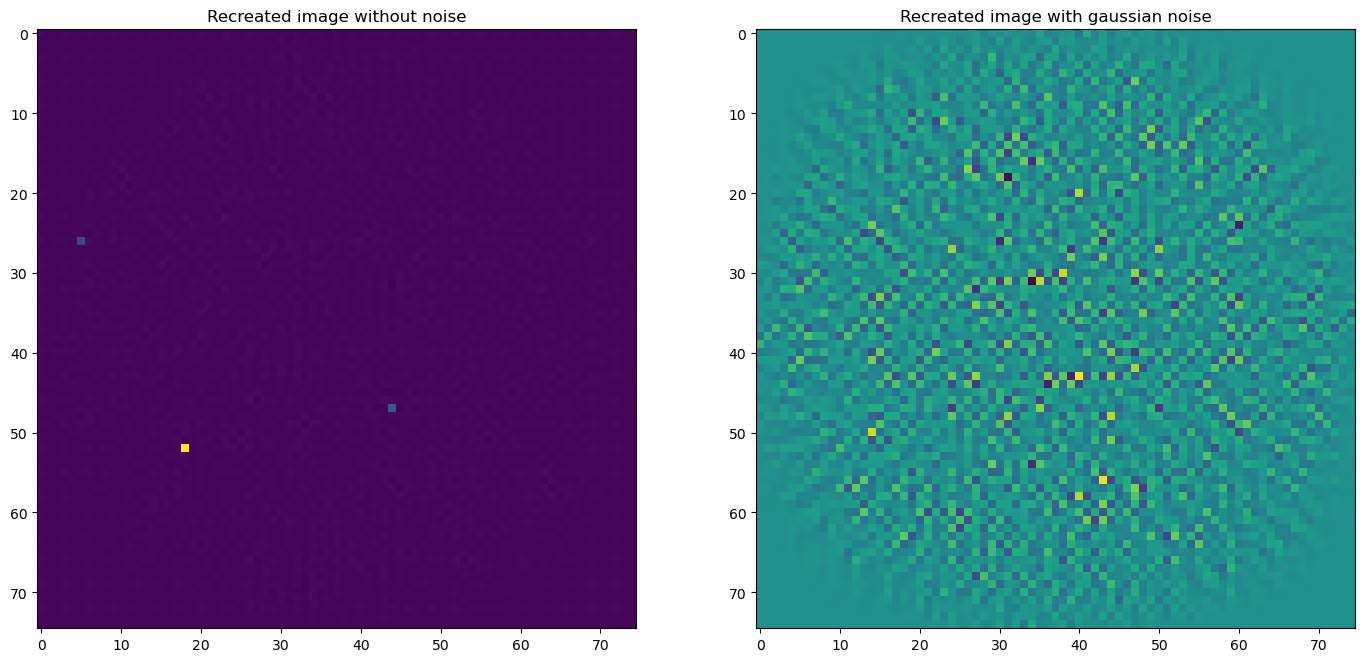

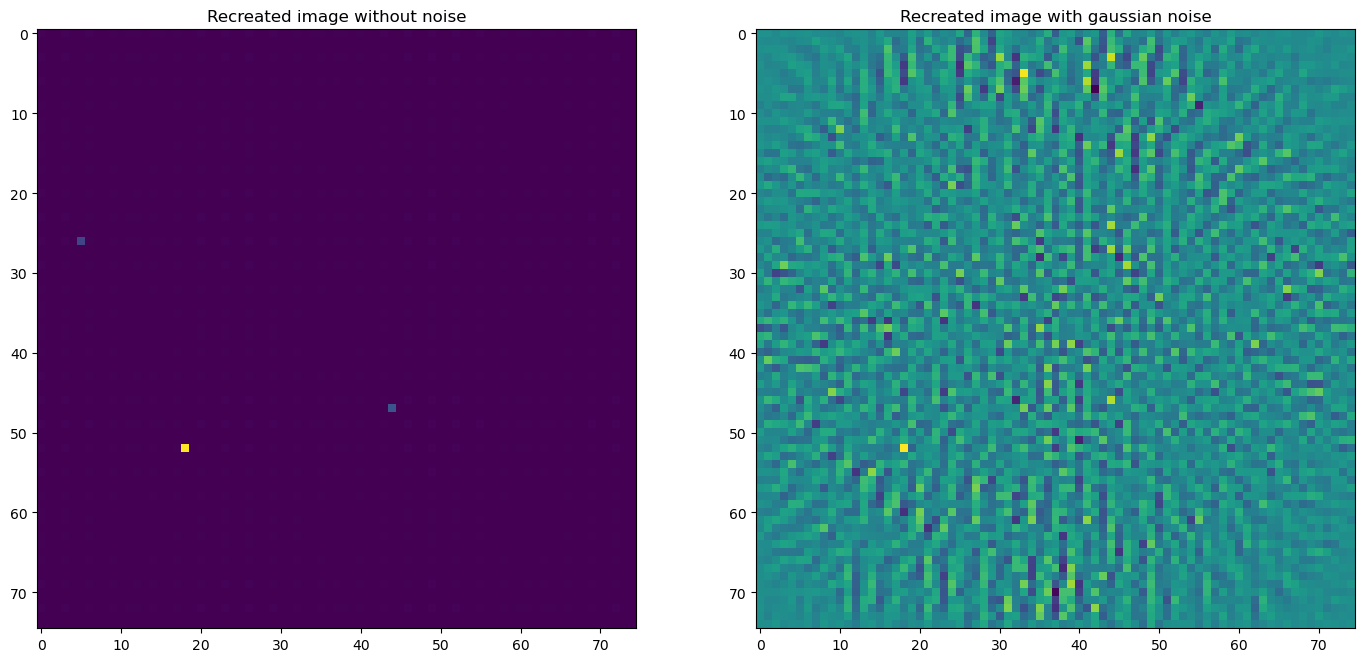

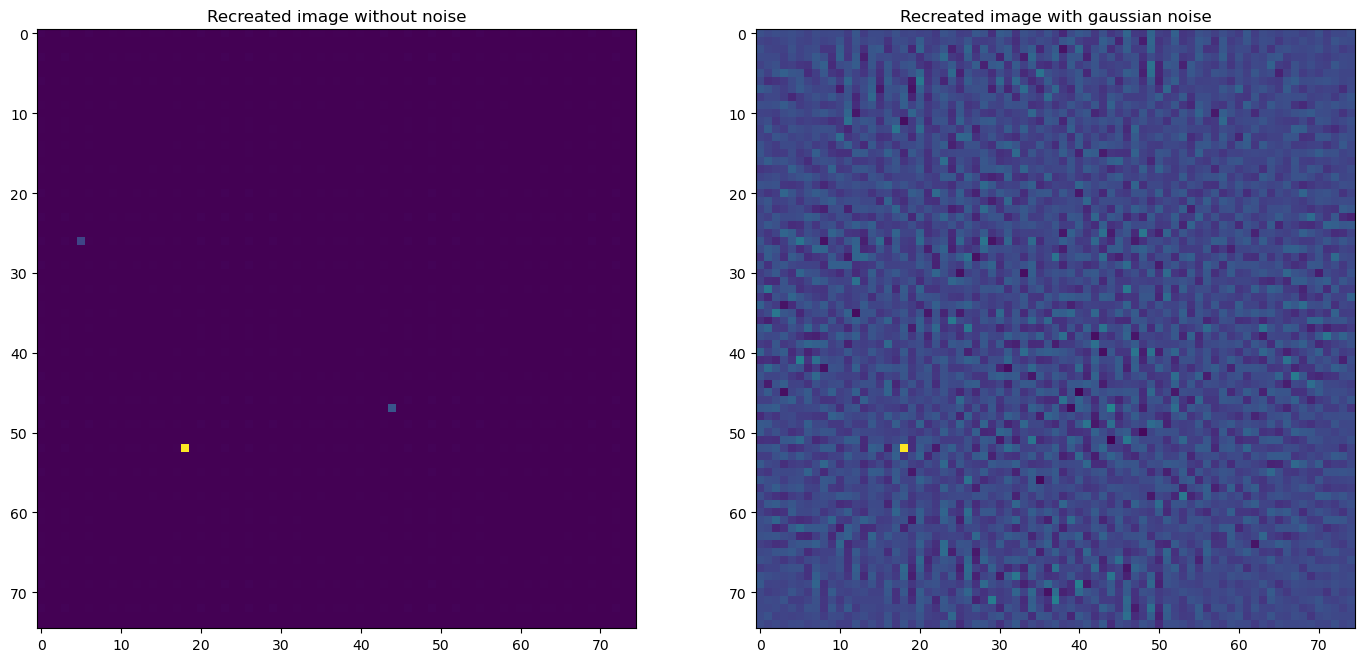

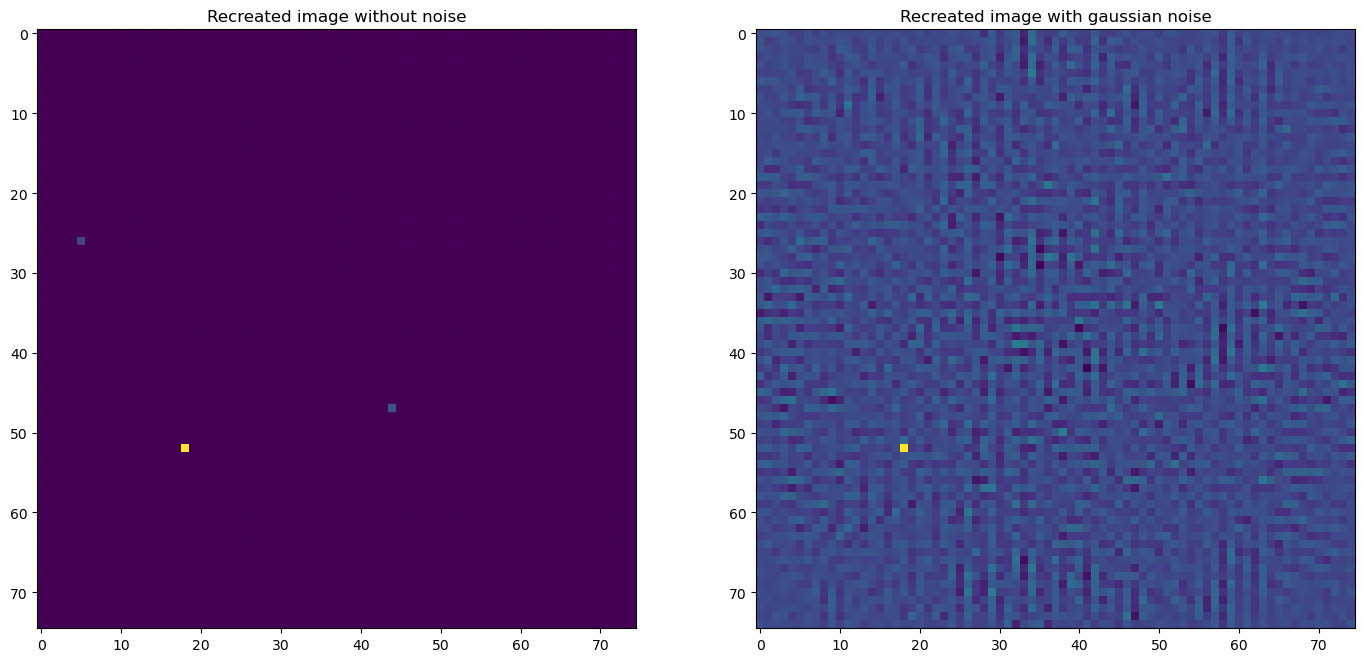

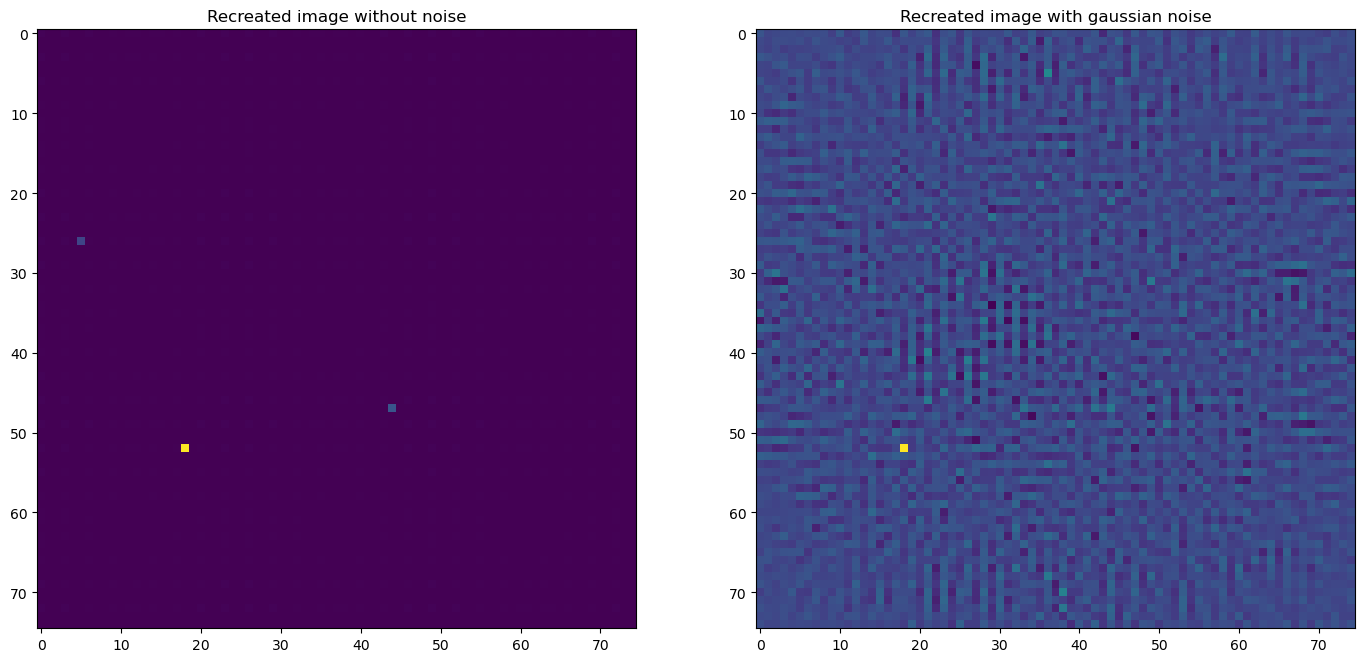

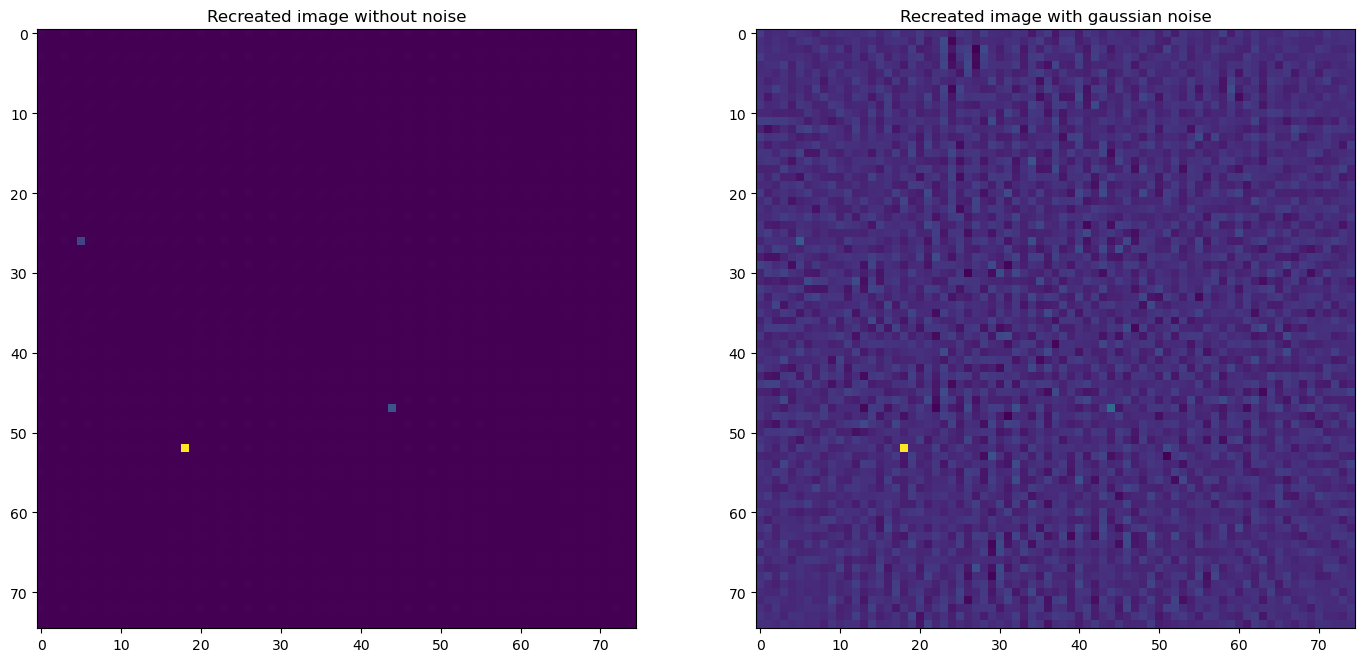

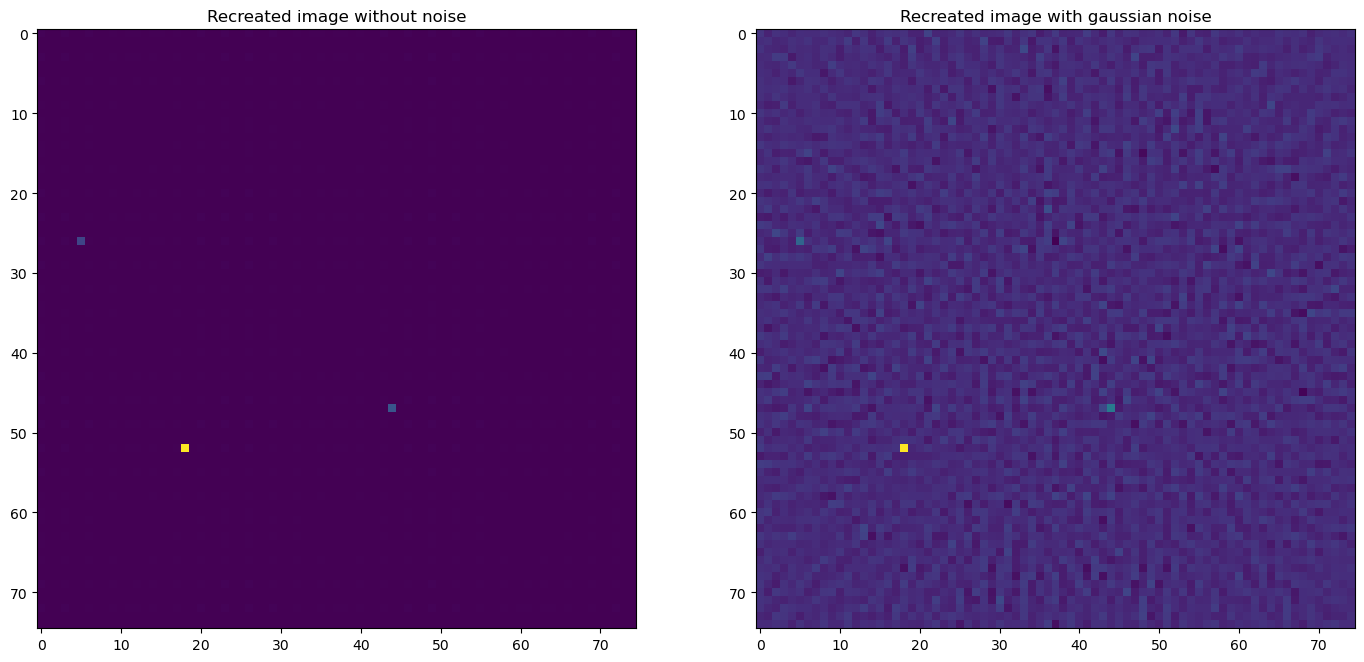

[6.214941190894287,
 6.214941190894287,
 6.214941190894287,
 6.214941190894287,
 6.214941190894287,
 6.214941190894287,
 6.214941190894287,
 6.214941190894287]

In [28]:
# first for change in the ps
MSEsp = []
x_no_noises = []
x_noisies = []
for a in A_change_p:
    x_nn,x_n = recreateImage(a,resized_im)
    x_no_noises.append(x_nn)
    x_noisies.append(x_n)
    MSEsp.append(np.mean(np.square(x_no_Noise-x_noisy)))

MSEsp

In [29]:
MSEsp = []
for (x_nn,x_n) in zip(x_no_noises,x_noisies):
    MSEsp.append(np.mean(np.square(x_nn-x_n)))

MSEsp

[6.548747805837488e+27,
 7.084135210479293e+26,
 59.63251936561039,
 5.5901749363967905,
 4.341481708381077,
 3.9481472900448495,
 1.5154392894898385,
 1.0078524060357152]

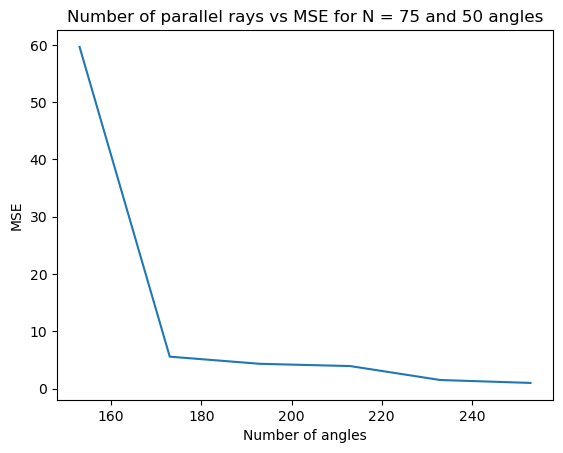

In [30]:
plt.plot(ps[2:],MSEsp[2:])
plt.xlabel("Number of angles")
plt.ylabel("MSE")
plt.title(f"Number of parallel rays vs MSE for N = {N} and {nr_angles} angles")
plt.show()

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1594/2370831630.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1594/2370831630.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


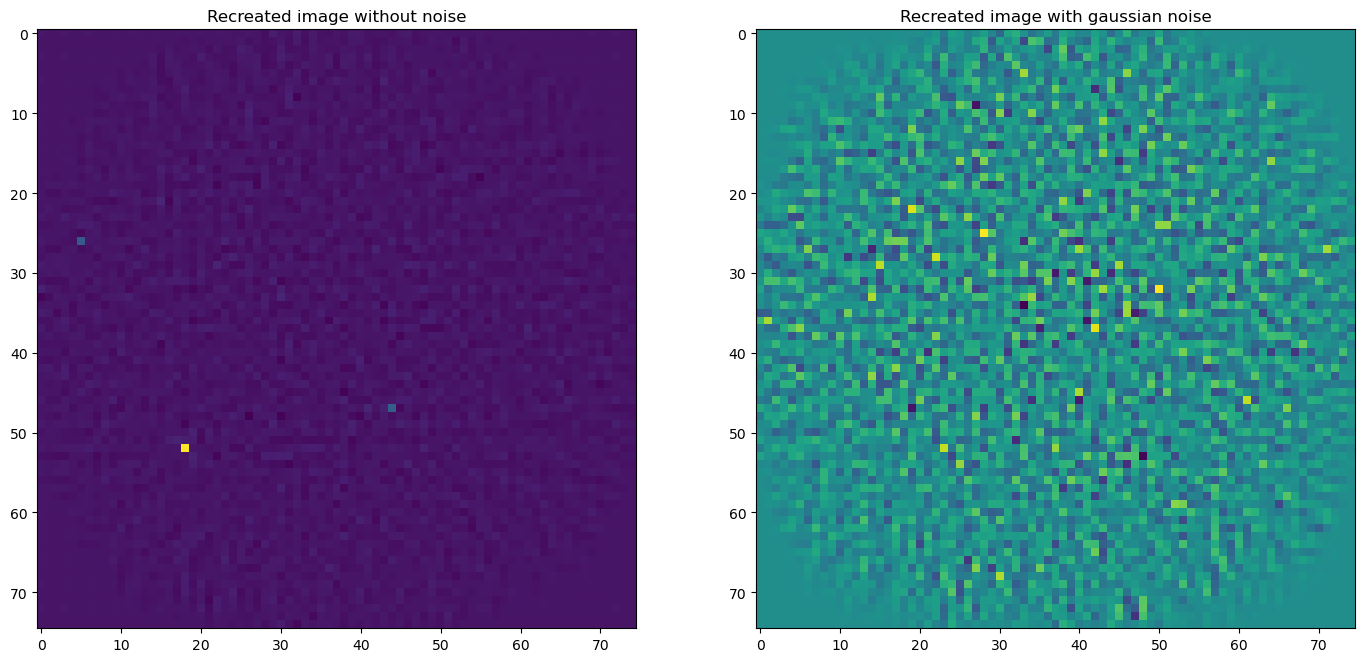

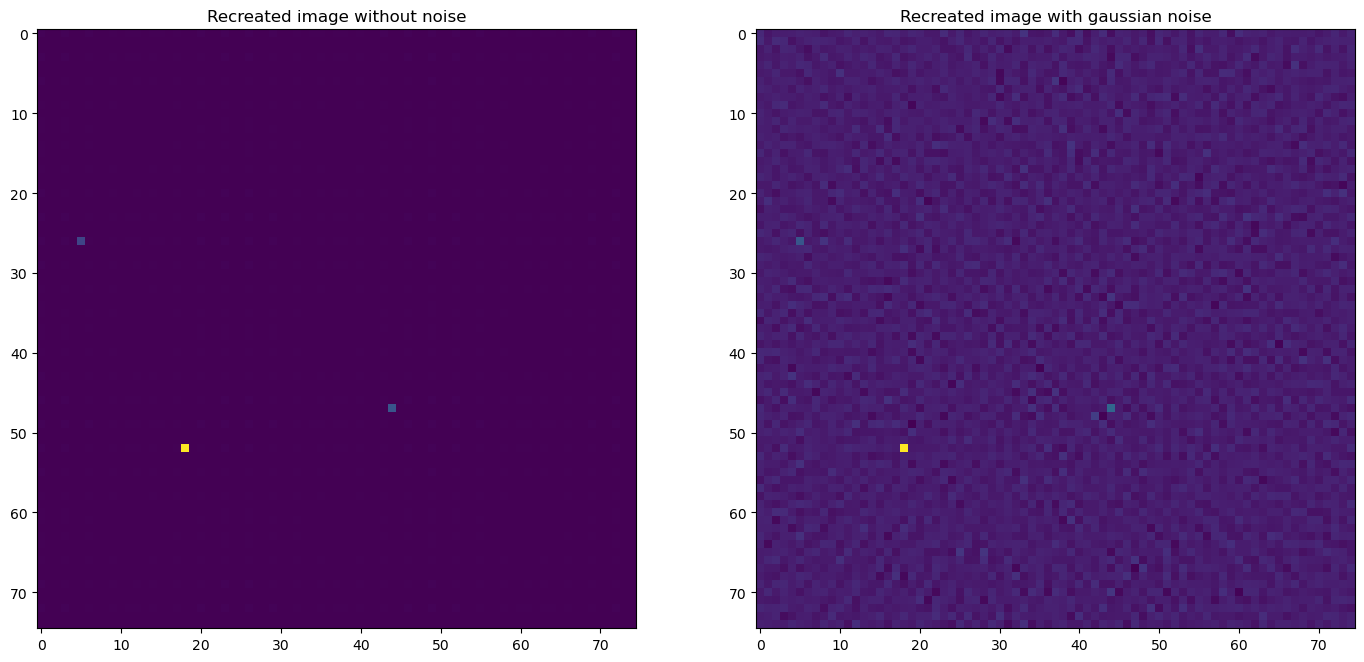

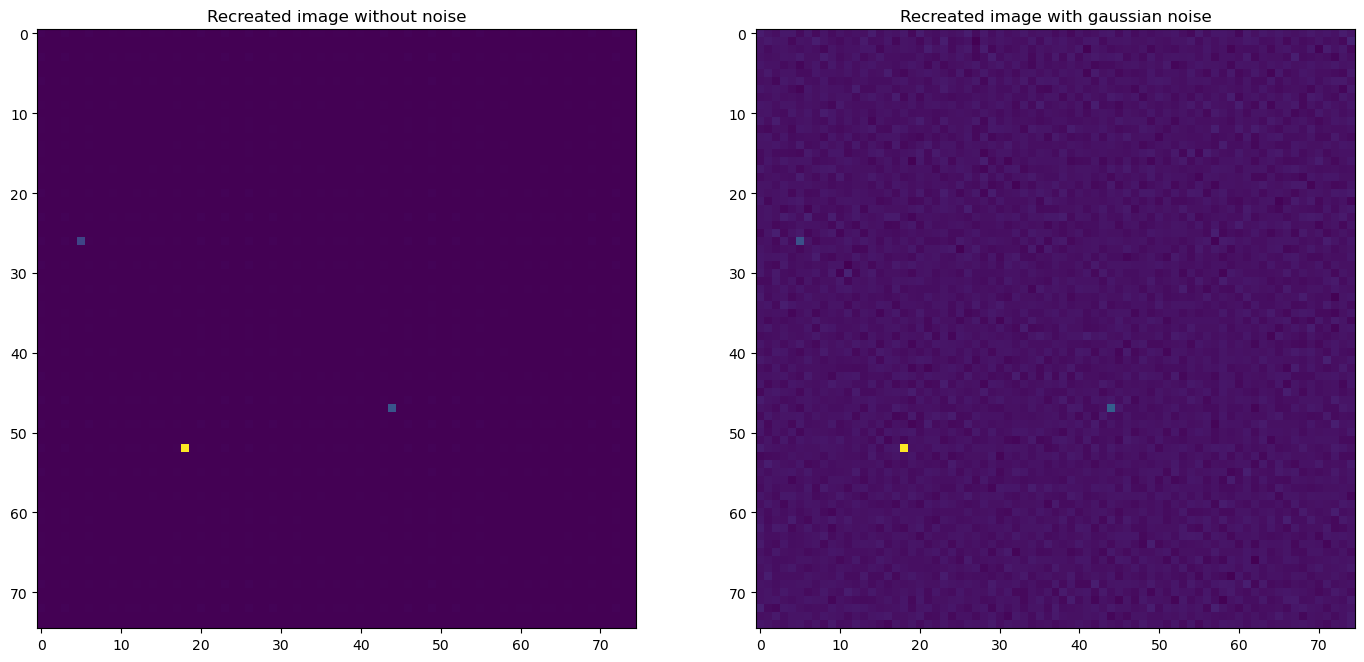

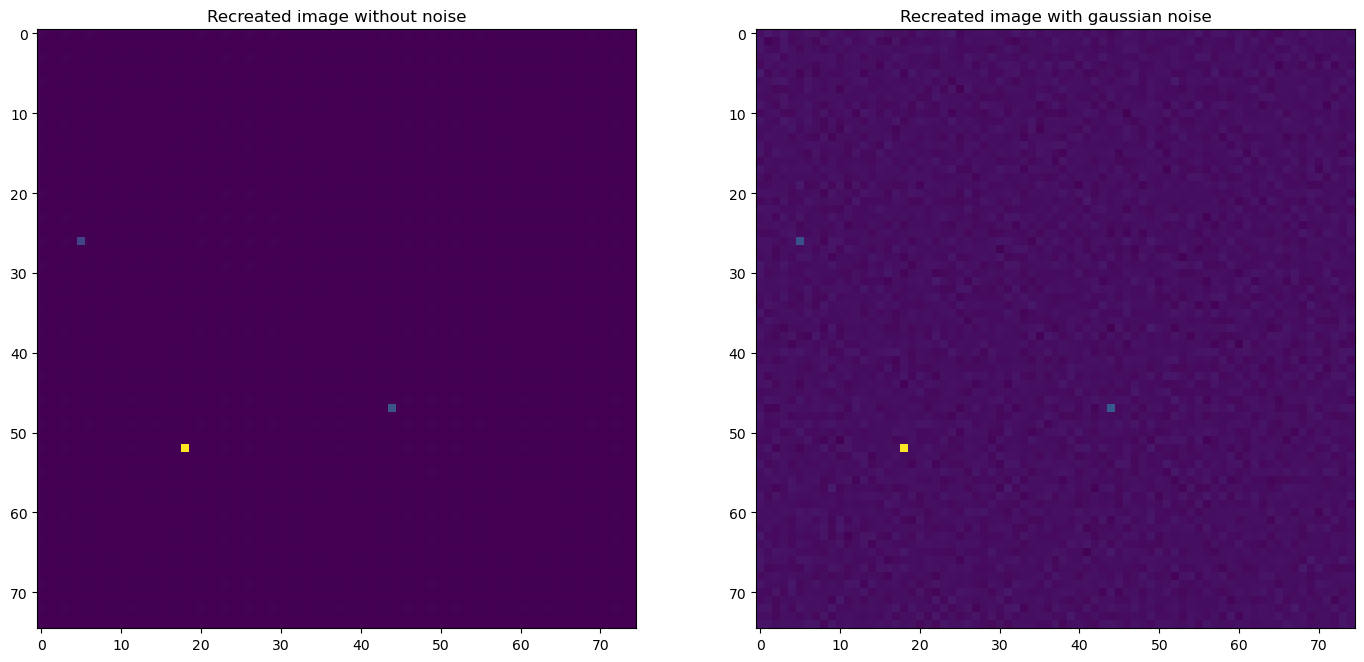

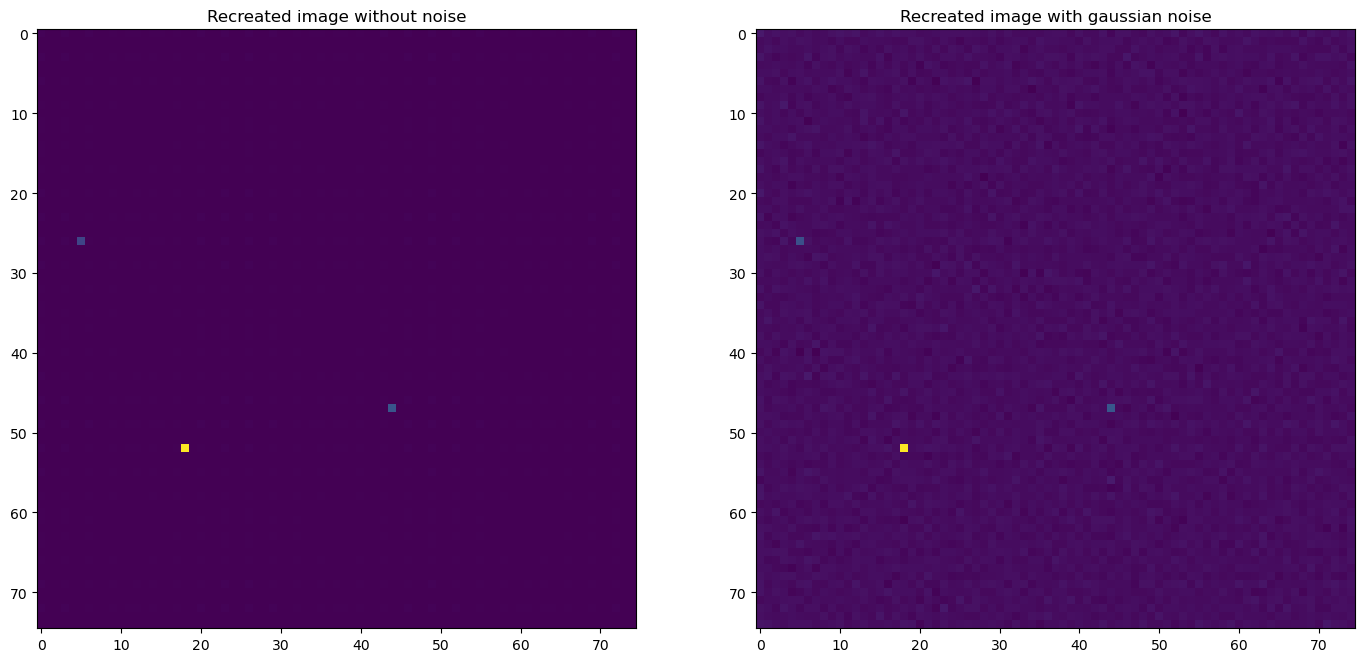

[5.568039192417459e+27,
 0.5407174282682833,
 0.15588100761587387,
 0.098670587813622,
 0.07545618617153982]

In [31]:
# now for change in number of angles
MSEsang = []
x_no_noises_ang = []
x_noisies_ang = []
for a in A_change_angles:
    x_nn,x_n = recreateImage(a,resized_im)
    x_no_noises_ang.append(x_nn)
    x_noisies_ang.append(x_n)
    MSEsang.append(np.mean(np.square(x_nn-x_n)))

MSEsang

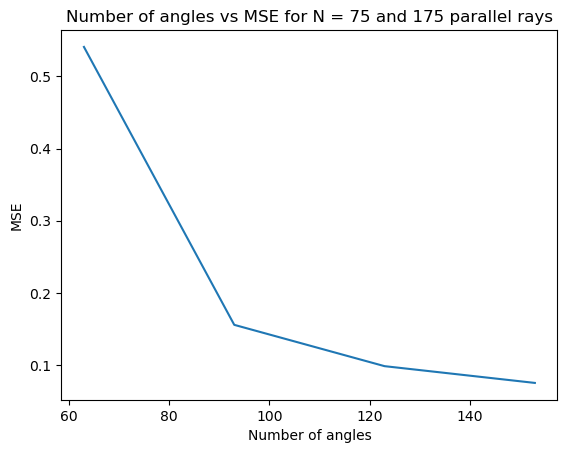

In [32]:
plt.plot(nr_angles_var[1:],MSEsang[1:])
plt.xlabel("Number of angles")
plt.ylabel("MSE")
plt.title(f"Number of angles vs MSE for N = {N} and {p_opt} parallel rays")
plt.show()

# Alternative Solutions Strategies and Further Validation
After this analysis we will now settle on the parameters N = 75 with 90 angles and 175 parallel rays, as it provides us with an accceptable and interpretable result while the computation effort remains within a convinient range. 
In this section we will investigate alternative strategies to solve the matrix equation
$$
  A x = b
$$ 
to the overdetermined system. So far this was done using a least squares approach, alternatively the Singular Value Decomposition (SVD) approach is investigated.

Furthermore, more variety is added to the noise in the generated test images. Additionally to modifying the parameters for the Gaussian noise, some images will be generated using Poison-distributed noise.

In [12]:
angles_opt = 90
theta_opt = np.matrix(np.linspace(0,179,angles_opt))
N = 75
angles_opt,p_opt,N
theta_opt.shape

(1, 90)

In [13]:
# Generate A for optimal parameters
[A_opt,theta,p,d] = pt.paralleltomo(N,theta_opt,p_opt)
cA_opt = np.log10(np.linalg.cond(A_opt))
cA_opt

1.5694490075078806

In [14]:
b_opt = calculatingB(A_opt,resized_im)

We will now attempt to solve the linear equation system using different strategies. 
1) Least squares solution
2) QR decomposition
3) Singular value decomposition

In [15]:
# QR
Q,R = np.linalg.qr(A_opt)


In [62]:
# compute y = Q^T b
y = np.dot(Q.T,b_opt)
y.shape, b_opt.shape

((5625,), (15750,))

In [63]:
# solve Rx = y using back substitution
n = len(y)
x = np.zeros(n)

for i in range(n-1,-1,-1):
    x[i] = y[i]
    for j in range(i+1,n):
        x[i] -= R[i,j] * x[j]
    x[i] /= R[i,i]

x 


array([ 3.21906960e-01,  2.60670000e-15,  2.61005643e-02, ...,
       -5.32816498e-16, -1.03259512e-15,  2.31997247e-15])

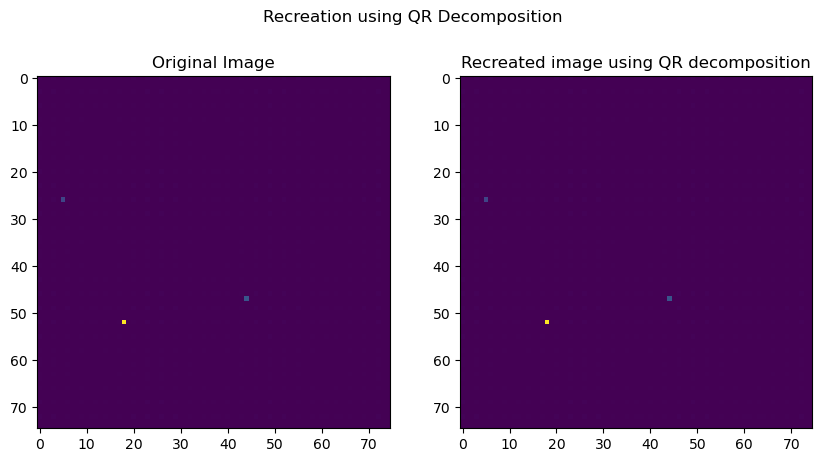

In [73]:
resized_qr_nn = np.resize(x, (N,N))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(resized_im)
axs[0].set_title("Original Image")
axs[1].imshow(resized_qr_nn)
axs[1].set_title("Recreated image using QR decomposition")
fig.suptitle("Recreation using QR Decomposition")

plt.show()

We will now investigate Singular value decompositon. Singular value decomposition, short SVD, is used to solve overdetermined linear systems by decomposing the system matrix into three components.

In [16]:
U,S,Vt = np.linalg.svd(A_opt)

In [68]:
S_inv = np.zeros_like(A_opt).T
S_inv[:min(A_opt.shape),:min(A_opt.shape)] = np.diag(S**(-1))
A_inv = Vt.T.dot(S_inv).dot(U.T)
A_inv.shape

(5625, 15750)

In [69]:
x_svd = A_inv.dot(b_opt)

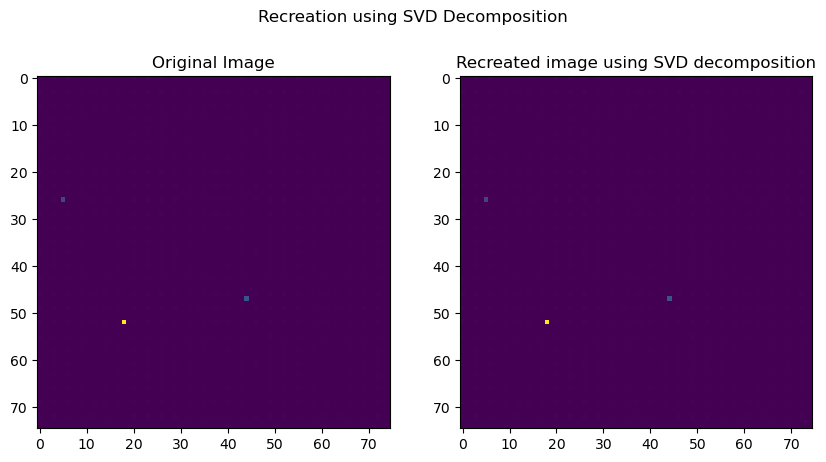

In [74]:
resized_svd_nn = np.resize(x_svd, (N,N))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(resized_im)
axs[0].set_title("Original Image")
axs[1].imshow(resized_svd_nn)
axs[1].set_title("Recreated image using SVD decomposition")
fig.suptitle("Recreation using SVD Decomposition")

plt.show()

In order to properly assess and compare the differences in performace we will add noise and compare. We introduce a slightly modified noise function. It utilises the error rates of commercial x-ray tomographs, as stated in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6540865/.
 

In [27]:
def addNoise(b,lower_bound = 0.2,upper_bound = 0.3):
    std = np.sqrt(np.mean(b)*(1-np.random.uniform(lower_bound, upper_bound))/(len(b)-1))
    # noise = np.random.normal(0, std, b.shape)
    noise = np.random.normal(np.mean(b), np.std(b), b.shape)
    noisy_b = b + noise
    return noisy_b

In [17]:
# declare functions for different types of solving the linear system problem

def LeastSq(A,b):
    return np.linalg.lstsq(A, b)[0]

def qr_sol(Q,R,b):
    y = np.dot(Q.T,b)
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= R[i,j] * x[j]
        x[i] /= R[i,i]
    
    return x

def svd_sol(U,S,Vt,A,b):

    S_inv = np.zeros_like(A).T
    S_inv[:min(A.shape),:min(A.shape)] = np.diag(S**(-1))
    A_inv = Vt.T.dot(S_inv).dot(U.T)
    x = A_inv.dot(b)
    
    return x

In [29]:
# add noise to the b vector
b_opt_noise = addNoise(b_opt)


In [30]:
# run for least squares
x_lstsq = LeastSq(A_opt,b_opt)
x_lstsq_noise = LeastSq(A_opt,b_opt_noise)

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_1621/3730367790.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]


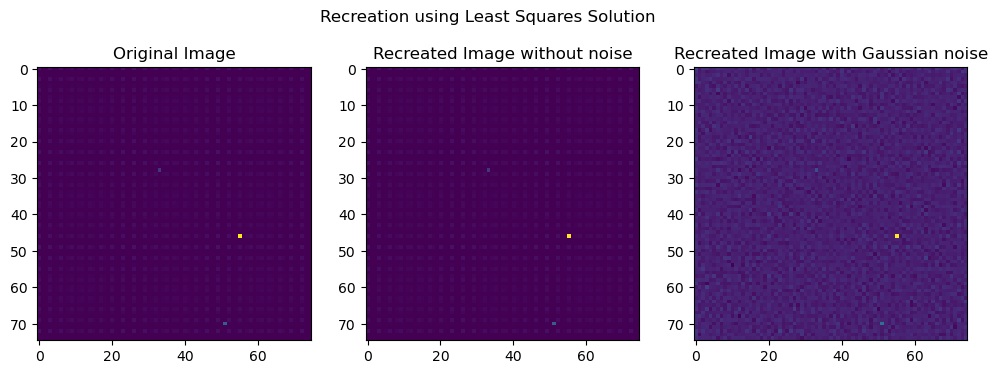

In [31]:
resized_lstsq_nn = np.resize(x_lstsq, (N,N))
resized_lstsq_n = np.resize(x_lstsq_noise, (N,N))
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(resized_im)
axs[0].set_title("Original Image")
axs[1].imshow(resized_lstsq_nn)
axs[1].set_title("Recreated Image without noise")
axs[2].imshow(resized_lstsq_n)
axs[2].set_title("Recreated Image with Gaussian noise")
fig.suptitle("Recreation using Least Squares Solution")

plt.show()

In [32]:
# run for qr
x_qr = qr_sol(Q,R,b_opt)
x_qr_noise = qr_sol(Q,R,b_opt_noise)

Side note: the QR solver is significantly more computationally effective, in case the quality of the results are similar, it is worth considering to adapt this method as a preferred way of solving the system.

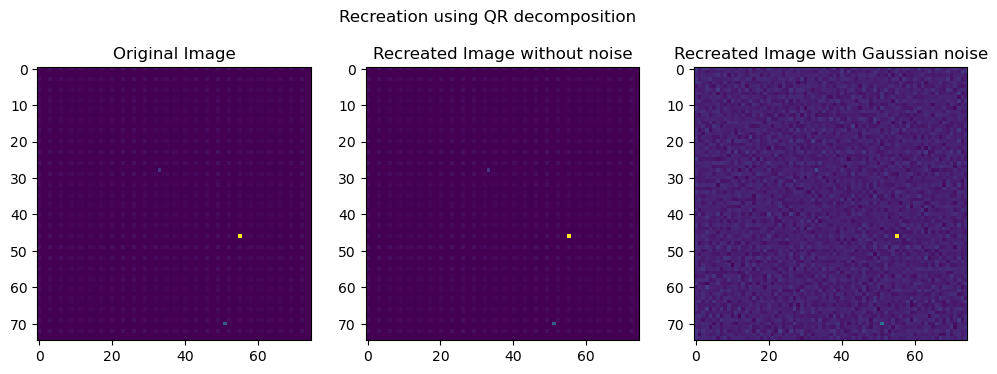

In [33]:
resized_qr_nn = np.resize(x_qr, (N,N))
resized_qr_n = np.resize(x_qr_noise, (N,N))
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(resized_im)
axs[0].set_title("Original Image")
axs[1].imshow(resized_qr_nn)
axs[1].set_title("Recreated Image without noise")
axs[2].imshow(resized_qr_n)
axs[2].set_title("Recreated Image with Gaussian noise")
fig.suptitle("Recreation using QR decomposition")

plt.show()

In [34]:
# run for svd
x_svd = svd_sol(U,S,Vt,A_opt,b_opt)
x_svd_noise = svd_sol(U,S,Vt,A_opt,b_opt_noise)

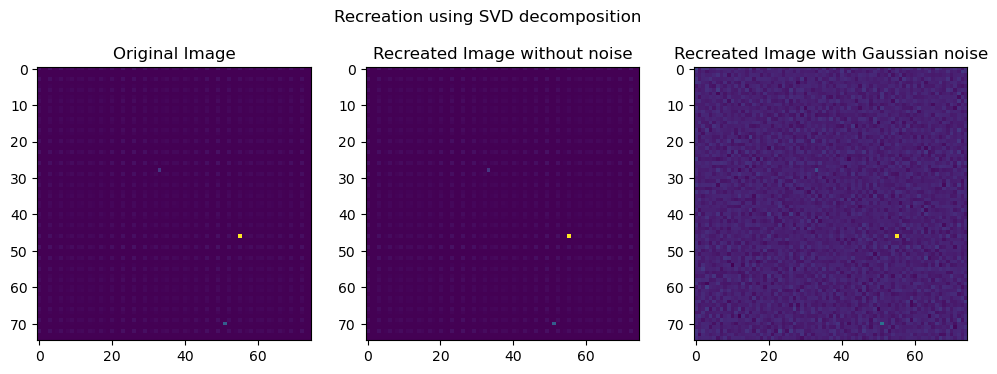

In [35]:
resized_svd_nn = np.resize(x_svd, (N,N))
resized_svd_n = np.resize(x_svd_noise, (N,N))
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(resized_im)
axs[0].set_title("Original Image")
axs[1].imshow(resized_svd_nn)
axs[1].set_title("Recreated Image without noise")
axs[2].imshow(resized_svd_n)
axs[2].set_title("Recreated Image with Gaussian noise")
fig.suptitle("Recreation using SVD decomposition")

plt.show()

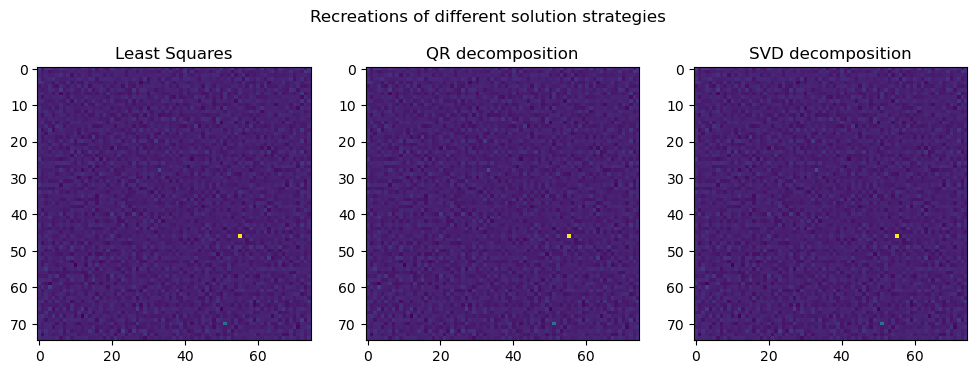

In [36]:
# show side-to-side comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(resized_lstsq_n)
axs[0].set_title("Least Squares")
axs[1].imshow(resized_qr_n)
axs[1].set_title("QR decomposition")
axs[2].imshow(resized_svd_n)
axs[2].set_title("SVD decomposition")
fig.suptitle("Recreations of different solution strategies")

plt.show()

From the figure above we can determine that there are virtually no differences in performance between the solution methods. Since that is the case, we will proceed using QR decomposition, as it has proven by far the most efficient out of the three.

# Alternative Test Images
